In [1]:
import pandas as pd
import seaborn as sns
import json
import glob
import re
import os
import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import preprocessing
from scipy.stats import boxcox
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

<h1>Data Collection</h1>

In [27]:
df=pd.read_csv("dataset.csv")

In [28]:
mainData = df.copy()

In [29]:
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [30]:
df["year"]=pd.DatetimeIndex(df["Start_Time"]).year
df['year'].value_counts()

year
2022    1762452
2021    1563753
2020    1178913
2019     954303
2018     893426
2017     718093
2016     410821
2023     246633
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

<b>Counting the numerical columns in the data.</b>

In [32]:
numeric = ['int16','int32','int64','float16','float32','float64' ]
numeric_df = df.select_dtypes(include=numeric)
print(" Number of Numerical columns are :", len(numeric_df.columns))

 Number of Numerical columns are : 14


In [33]:
# Unique Values in each Numerical column
numeric_df.nunique()

Severity                   4
Start_Lat            2428358
Start_Lng            2482533
End_Lat              1568172
End_Lng              1605789
Distance(mi)           22382
Temperature(F)           860
Wind_Chill(F)           1001
Humidity(%)              100
Pressure(in)            1144
Visibility(mi)            92
Wind_Speed(mph)          184
Precipitation(in)        299
year                       8
dtype: int64

<h1>Data Cleaning</h1>

<b>Missing values per column</b>

In [34]:
percentage_of_missing_values=df.isna().sum()/len(df)*100
print(percentage_of_missing_values.sort_values(ascending=False)[0:20])

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
dtype: float64


In [35]:
# dropping columns with high missing values
df.drop(["Precipitation(in)"],axis=1,inplace=True)
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)
df.drop(["End_Lat"],axis=1,inplace=True)
df.drop(["End_Lng"],axis=1,inplace=True)

In [36]:
percentage_of_missing_values.drop(["Precipitation(in)","Wind_Chill(F)","End_Lat","End_Lng"],inplace = True)

In [37]:
# Imputing missing values in numerical columns

df["Temperature(F)"]=df["Temperature(F)"].fillna(df["Temperature(F)"].median())
df["Visibility(mi)"]=df["Visibility(mi)"].fillna(df["Visibility(mi)"].median())
df["Wind_Speed(mph)"]=df["Wind_Speed(mph)"].fillna(df["Wind_Speed(mph)"].median())
df["Humidity(%)"]=df["Humidity(%)"].fillna(df["Humidity(%)"].median())

# Imputing missing values in categorical values
df["Weather_Condition"]=df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0])

# Removing the data records with missing values
columns_with_missing_values = [column for column, percentage in percentage_of_missing_values.items() if percentage != 0]
df.dropna(subset=columns_with_missing_values, inplace=True)
    


<h1><b>Exploratory data analysis

<b>States with Number of Accidents

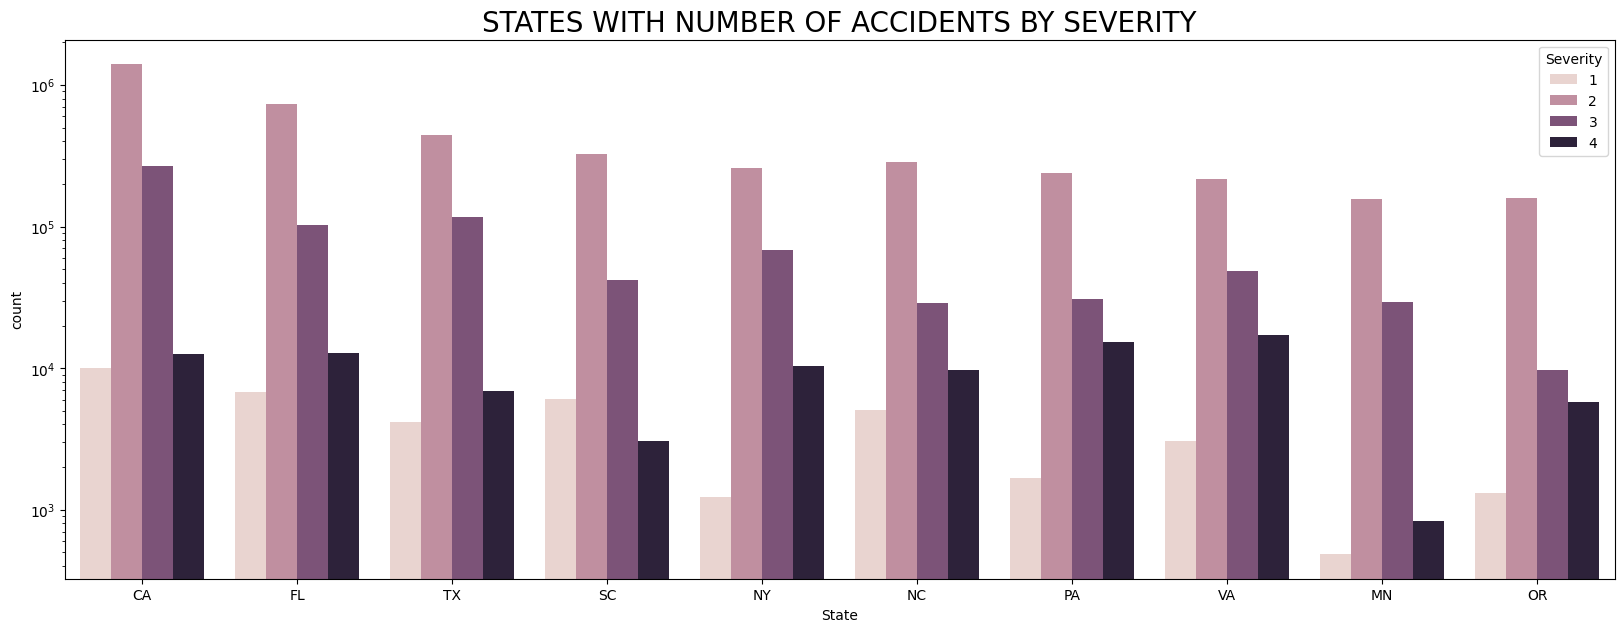

In [38]:
plt.figure(figsize=(20, 7))

# value_counts to get the counts in descending order
order = df['State'].value_counts().head(10).index

# Count plot with the specified order and hue for Severity
sns.countplot(x="State", data=df, order=order, hue="Severity")

plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS BY SEVERITY", fontsize=20)
plt.legend(title="Severity", loc="upper right")
plt.show()

<b>Cities with highest number of accidents

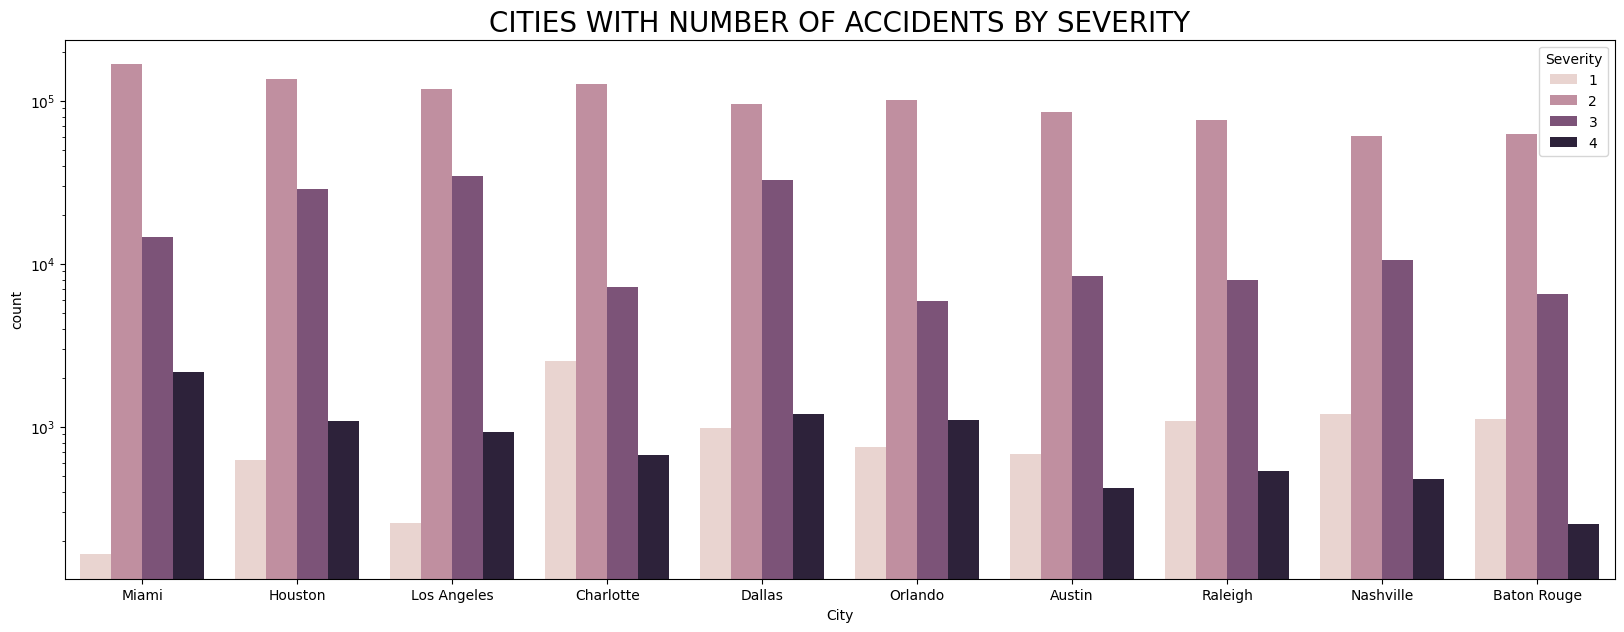

In [39]:
plt.figure(figsize=(20, 7))

# value_counts to get the counts in descending order
order = df['City'].value_counts().head(10).index

# Count plot with the specified order and hue for Severity
sns.countplot(x="City", data=df, order=order, hue="Severity")

plt.yscale("log")
plt.title("CITIES WITH NUMBER OF ACCIDENTS BY SEVERITY", fontsize=20)
plt.legend(title="Severity", loc="upper right")
plt.show()

<b>Severity Analysis</b>

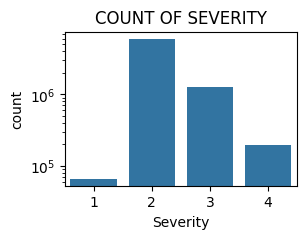

In [40]:
# print(df["Severity"].value_counts())
plt.figure(figsize=(3,2))
sns.countplot(x="Severity",data=df)
plt.yscale("log")
plt.title("COUNT OF SEVERITY")
plt.show()

<b>Year wise Accidents</b>




In [41]:
yearly_accidents=pd.DatetimeIndex(df["Start_Time"]).year.value_counts().reset_index()
yearly_accidents.columns=["year","accidents"]
yearly_accidents

,year,accidents
0,2022,1692198
1,2021,1516725
2,2020,1141626
3,2019,933000
4,2018,876831
5,2017,705326
6,2016,405674
7,2023,236506


<b>Month-yearly wise Accidents

<Axes: xlabel='month', ylabel='number_of_accidents'>

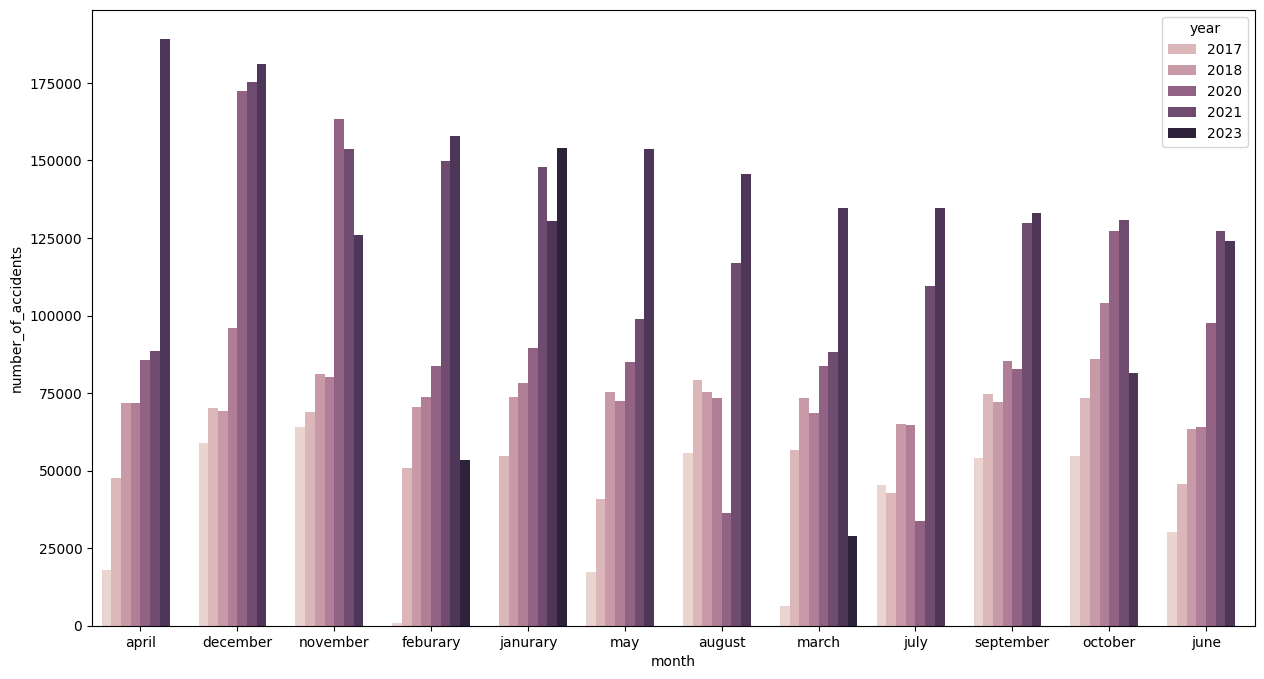

In [42]:
# df["month"]=pd.DatetimeIndex(df["Start_Time"]).month
df["month"]=pd.DatetimeIndex(df["Start_Time"]).month.map({1:"janurary",
                2:"feburary",
                3:"march",
                4:"april",
                5:"may",
                6:"june",
                7:"july",
                8:"august",
                9:"september",
                10:"october",
                11:"november",
                12:"december"})
monthly_accidents=df["month"].value_counts().reset_index()
monthly_accidents.columns=["month","accidents"]
monthly_accidents=df[["month","year"]].value_counts().reset_index()
monthly_accidents.columns=["month","year","number_of_accidents"]
plt.figure(figsize=(15,8))
sns.barplot(x="month",y="number_of_accidents",hue="year",data=monthly_accidents)

<b> Year * Severity - Bar graph</b> 

<Axes: xlabel='year'>

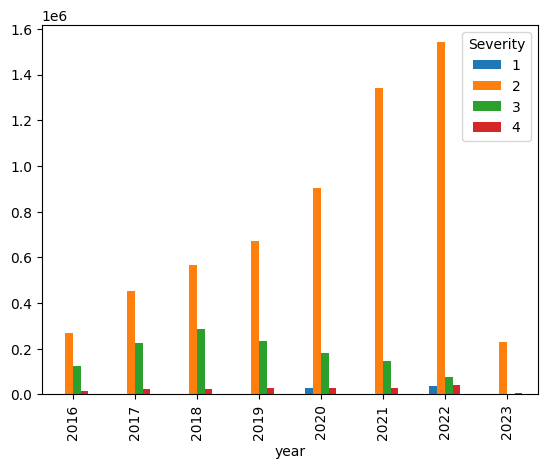

In [43]:
pd.crosstab(df["year"],df["Severity"]).plot(kind="bar")

<b>Road Conditions vs Number of Accidents 

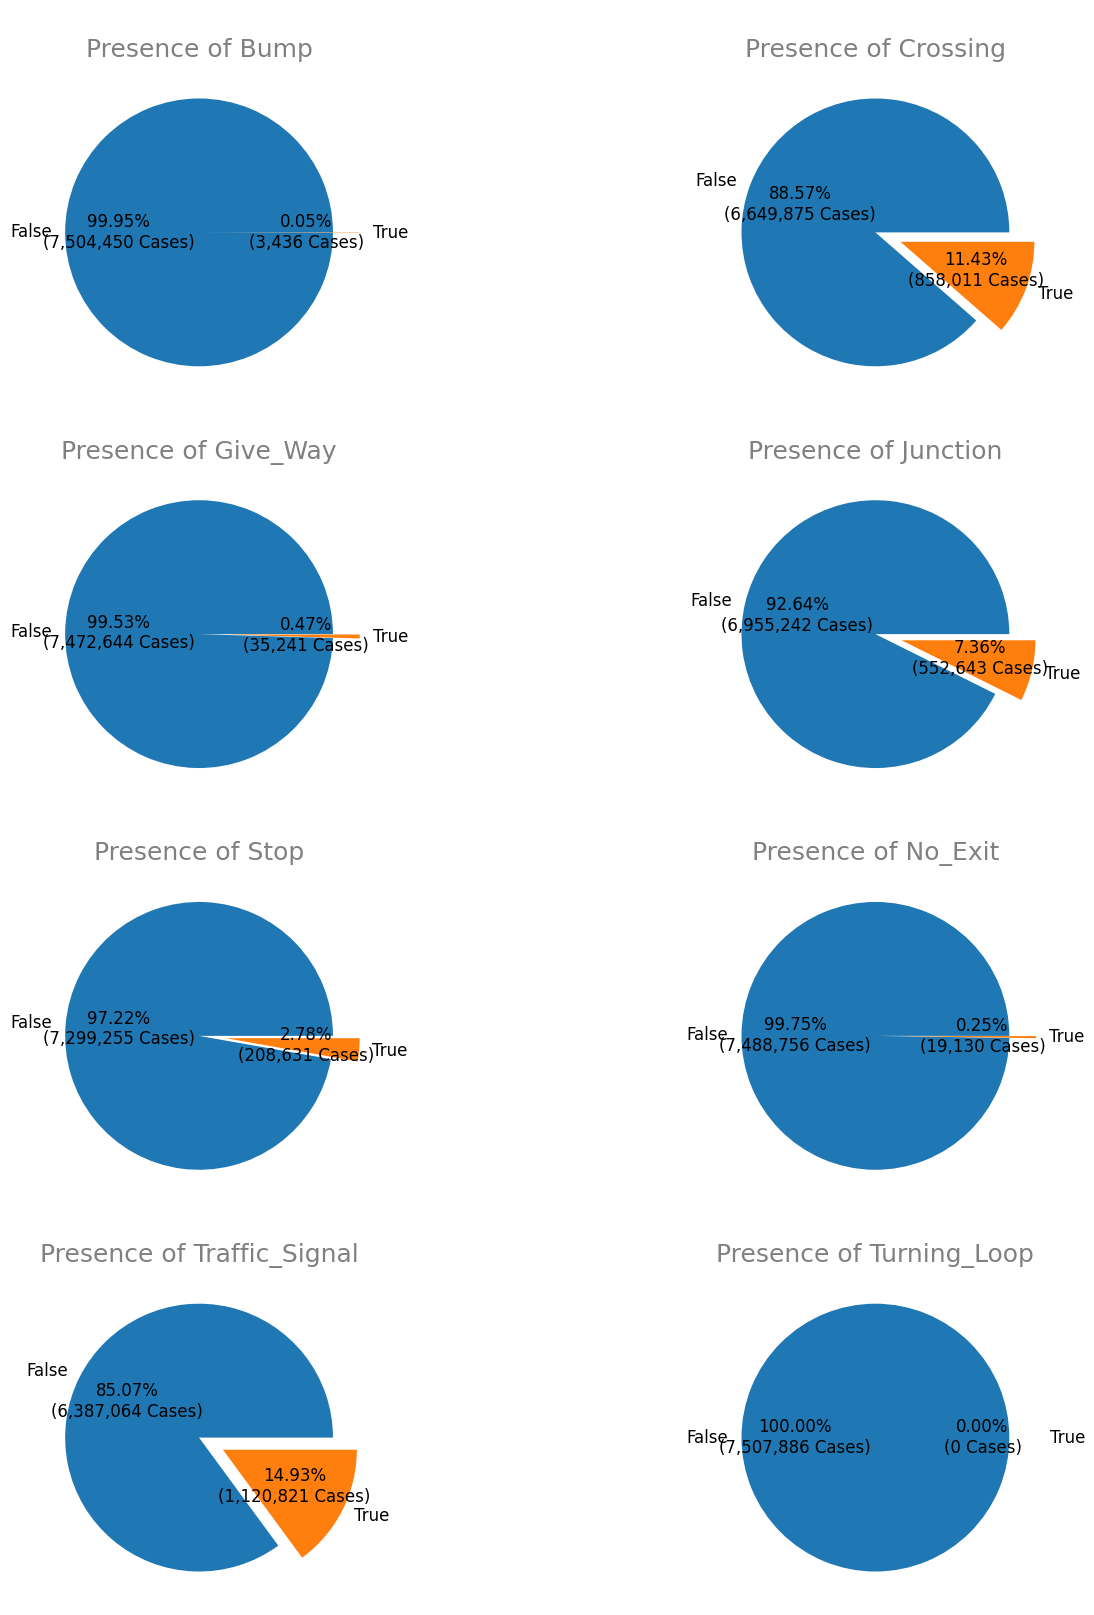

In [44]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels,
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1
        

In [45]:
# Extract year, month, day, hour and weekday
df['Month']=pd.DatetimeIndex(df["Start_Time"]).month
df['Day']=pd.DatetimeIndex(df["Start_Time"]).day
df['Hour']=pd.DatetimeIndex(df["Start_Time"]).hour

<b>Time Analysis of Accidents w.r.t hours in a day

Text(0, 0.5, 'No. of accidents')

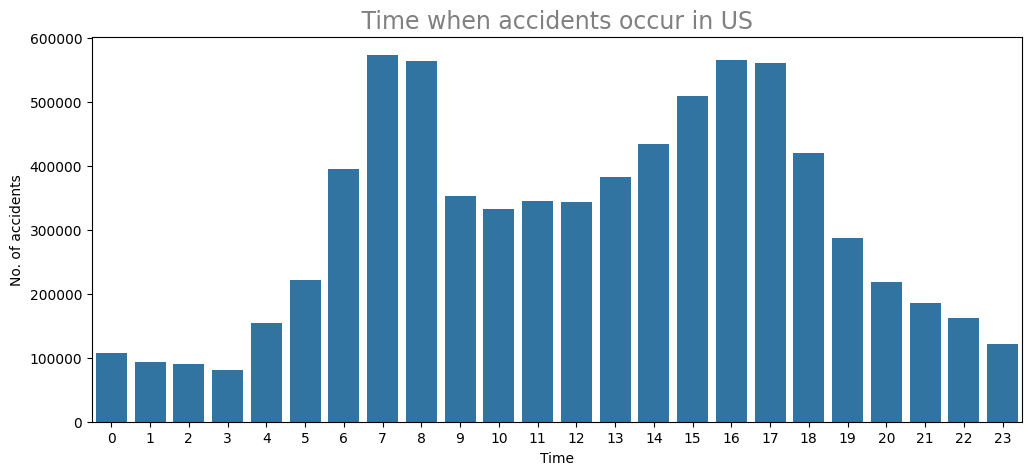

In [46]:
# extract the timestamp col to hours
time_max_acc=pd.DatetimeIndex(df["Start_Time"]).hour.value_counts()
plt.figure(figsize=(12,5))
sns.barplot(y=time_max_acc, x=time_max_acc.index)
plt.title(" Time when accidents occur in US ",size=17,color="grey")
plt.xlabel('Time')
plt.ylabel('No. of accidents')


<b>Time Analysis - No of Accidents vs Months in a year

Text(0, 0.5, 'No. of accidents')

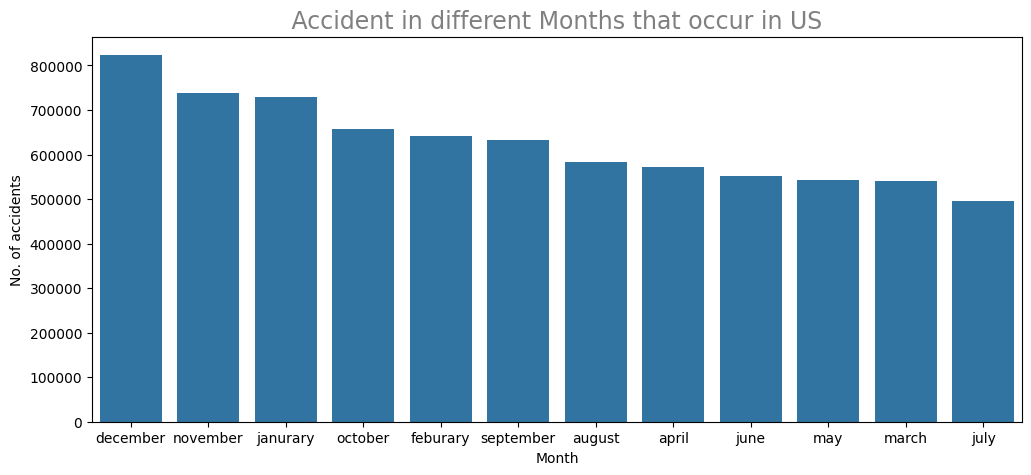

In [47]:
month_max_acc=df['month'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(y=month_max_acc, x=month_max_acc.index)
plt.title(" Accident in different Months that occur in US ",size=17,color="grey")
plt.xlabel('Month')
plt.ylabel('No. of accidents')

<b>Effect of Windspeed on accidents

<Axes: title={'center': ' Accident cases reported for different Windspeed '}, xlabel='No. of accidents', ylabel='Wind_Speed(mph)'>

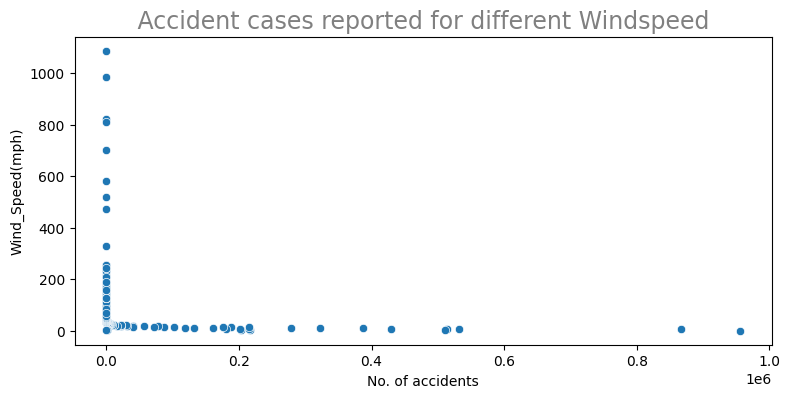

In [48]:
windspeed_effect=df["Wind_Speed(mph)"].value_counts()
windspeed_effect.sort_values().tail()
plt.figure(figsize=(9,4))
plt.title(" Accident cases reported for different Windspeed ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Wind_Speed(mph)')
sns.scatterplot(y=windspeed_effect.index, x=windspeed_effect)

<b>Effect of Pressure on accidents

<Axes: title={'center': ' Accident cases reported for different pressures '}, xlabel='No. of accidents', ylabel='Pressure(in)'>

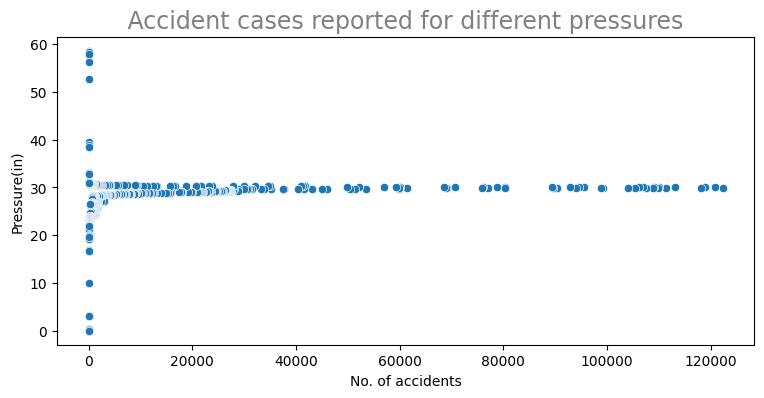

In [49]:
pressure_effect=df["Pressure(in)"].value_counts()
pressure_effect.sort_values().tail()
plt.figure(figsize=(9,4))
plt.title(" Accident cases reported for different pressures ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot(y=pressure_effect.index, x=pressure_effect)

<b>Effect of Weather on accidents

Text(0, 0.5, 'No. of accidents')

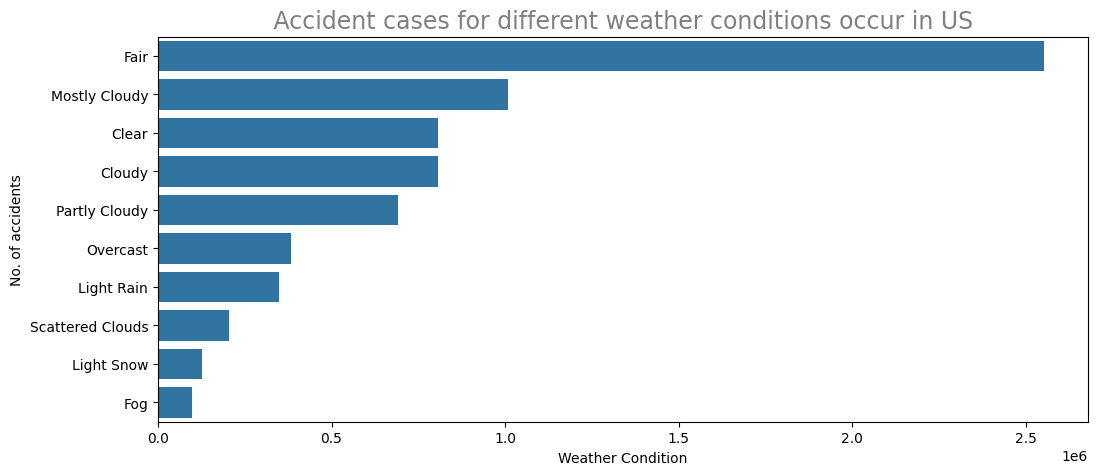

In [50]:
weather_effect=df["Weather_Condition"].value_counts()
weather=weather_effect.head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=weather, y=weather.index)
plt.title(" Accident cases for different weather conditions occur in US ",size=17,color="grey")
plt.xlabel('Weather Condition')
plt.ylabel('No. of accidents')

<h3><b>Feature Engineering</b></h3>

In [51]:
df[df['year']==2021].shape

(1516725, 47)

In [52]:
df = df[df['year']==2021]
df = df[df['State']=='CA']
df.shape

(331311, 47)

In [53]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

<b>Finding the Categorical Columns

In [54]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

for column in categorical_columns:
  print(column,df[column].unique().size)

ID 331311
Source 3
Description 212007
Street 34176
City 1052
County 58
State 1
Zipcode 51690
Country 1
Timezone 2
Airport_Code 131
Wind_Direction 18
Weather_Condition 55
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2
month 12


<b> Removing the useless columns and and columns with one categorical value

In [55]:
df = df.drop(['ID','Source','Start_Time','Timezone','Description',
              'Turning_Loop','Distance(mi)', 'End_Time','Street',
              'City','County','Country','State','Zipcode','Airport_Code',
              'Wind_Direction','Weather_Timestamp','Start_Lat','Start_Lng','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

<b>Converting the multiple complex weather conditions into simpler combinations

In [56]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [57]:
df = df.drop(['Weather_Condition'], axis=1)

In [58]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

for column in categorical_columns:
  print(column,df[column].unique().size)

Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
month 12
Clear 1
Cloud 2
Rain 2
Heavy_Rain 2
Snow 2
Heavy_Snow 2
Fog 2


<b>Converting the boolean categorical values to 0's and 1's

In [59]:
for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])


<h1><b>Data Splitting

In [60]:
y = df['Severity'].copy()
y=y-1
X = df.drop('Severity', axis=1).copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

<b>Train-Test Split

In [61]:
# Split the data set into training and validation data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)
X_train.shape
# Split the data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
X_train.shape

(212038, 29)

<h1><b>Model Selection and Initial Training

In [62]:
# Reloading necessary libraries
# import numpy and pandas
import pandas as pd
import numpy as np

# import for pre-processing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# import for visualization
import matplotlib.pyplot as plt

# import for model building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# import for Neural Network based model building
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [63]:

# Scalling the features of Train Dataset, Validation Dataset and Test Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Scaling Validation Dataset
scaler = scaler.fit(X_val)
X_val = scaler.transform(X_val)

# Scaling Test Dataset
scaler = scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [64]:
# Support Vector Machine

clf = SVC(gamma='auto', kernel='rbf', random_state=42)

# Training and Testing
clf.fit(X_train[:10000], y_train[:10000])
y_pred = clf.predict(X_test)

# Accuracy
print("Support Vector Machine accuracy_score: {:.3f}".format(accuracy_score(y_test, y_pred)))

Support Vector Machine accuracy_score: 0.929


In [65]:
# Support Vector Machine | Optimization

# Parameter grid
param_grid = {
    'C': [0.1, 0.5, 1],
    'gamma': ['auto', 'scale']
}

grid_search = GridSearchCV(cv=5, estimator = clf, param_grid = param_grid, scoring='balanced_accuracy', n_jobs = -1,verbose = 5)
grid_search.fit(X_val[:5000], y_val[:5000])

# hyperparameters
print(grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 0.1, 'gamma': 'auto'}


In [66]:
# SVM Final Evaluation

clf=SVC(**grid_search.best_params_, kernel='rbf', random_state=42)

clf.fit(X_train[:20000], y_train[:20000])
y_train_pred= clf.predict(X_train[:20000])
y_test_pred= clf.predict(X_test)

# Model Accuracy
train_accuracy, test_accuracy = accuracy_score(y_train[:20000], y_train_pred), accuracy_score(y_test, y_test_pred)
# print(classification_report(y_test, y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

Accuracy for the train dataset 93.0%
Accuracy for the test dataset 92.9%


In [67]:
# Decision Tree Algorithm | First Iteration
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

# Print accuracy
print('Decision Tree accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

Decision Tree accuracy_score: 0.887.


In [68]:
# Decision Tree Algorithm | Optimization

# Parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [12, 14, 16],
    'min_samples_split': [1000, 2000, 3000],
    'min_samples_leaf': [500, 1000, 1500]
}

# Grid search model
grid_search = GridSearchCV(cv=3, estimator = clf, param_grid = param_grid, scoring='balanced_accuracy', n_jobs = -1,verbose = 5)
grid_search.fit(X_val, y_val)
# Optimal hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 500, 'min_samples_split': 1000}


In [69]:
# Decision Tree Algorithm | Final Evaluation

# Decision Tree Classifier with optimal Parameters
clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X_train, y_train)
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)

# Model Accuracy
train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
# print(classification_report(y_test, y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')


Accuracy for the train dataset 93.1%
Accuracy for the test dataset 92.9%


In [70]:
# Random Forest Algorithm | First Iteration

# Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100, bootstrap=False, min_samples_split=400, min_samples_leaf=100, n_jobs=-1, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Model Accuracy
print("Randon forest algorithm accuracy_score: {:.3f}.".format(accuracy_score(y_test, y_pred)))

Randon forest algorithm accuracy_score: 0.929.


In [71]:
# Random Forest Algorithm | Optimization

# Parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [12, 14, 16],
    'min_samples_split': [200, 300],
    'min_samples_leaf': [50, 75],
    'bootstrap': [False]
}

grid_search = GridSearchCV(cv=3, estimator = clf, param_grid = param_grid, scoring='balanced_accuracy', n_jobs = -1,verbose = 5)
grid_search.fit(X_val[:15000], y_val[:15000])

# hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'bootstrap': False, 'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 100}


In [72]:
# Random Forest Algorithm | Final Evaluation

# Create a Random Forest Classifier
clf=RandomForestClassifier(**grid_search.best_params_, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
y_train_pred= clf.predict(X_train)
y_test_pred= clf.predict(X_test)

# Model Accuracy
train_accuracy, test_accuracy = accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)
# print(classification_report(y_test, y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

Accuracy for the train dataset 93.1%
Accuracy for the test dataset 92.9%


In [73]:
# ANN
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
4241/4241 [==============================] - 7s 2ms/step - loss: 0.2665 - accuracy: 0.9301 - val_loss: 0.2560 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 2/10
4241/4241 [==============================] - 3s 686us/step - loss: 0.2595 - accuracy: 0.9301 - val_loss: 0.2557 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 3/10
4241/4241 [==============================] - 3s 686us/step - loss: 0.2583 - accuracy: 0.9301 - val_loss: 0.2533 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 4/10
4241/4241 [==============================] - 3s 671us/step - loss: 0.2569 - accuracy: 0.9301 - val_loss: 0.2538 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 5/10
4241/4241 [==============================] - 3s 677us/step - loss: 0.2557 - accuracy: 0.9301 - val_loss: 0.2544 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 6/10
4241/4241 [==============================] - 3s 718us/step - loss: 0.2547 - accuracy: 0.9301 - val_loss: 0.2551 - val_accuracy: 0.9327 - lr: 0.0010


In [74]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.9294478297233582


In [75]:
losses=pd.DataFrame(history.history)

In [76]:
losses.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.266511,0.930101,0.256043,0.932678,0.001
1,0.259516,0.930119,0.255716,0.932678,0.001
2,0.258270,0.930136,0.253262,0.932678,0.001
3,0.256900,0.930119,0.253765,0.932678,0.001
4,0.255726,0.930142,0.254376,0.932678,0.001


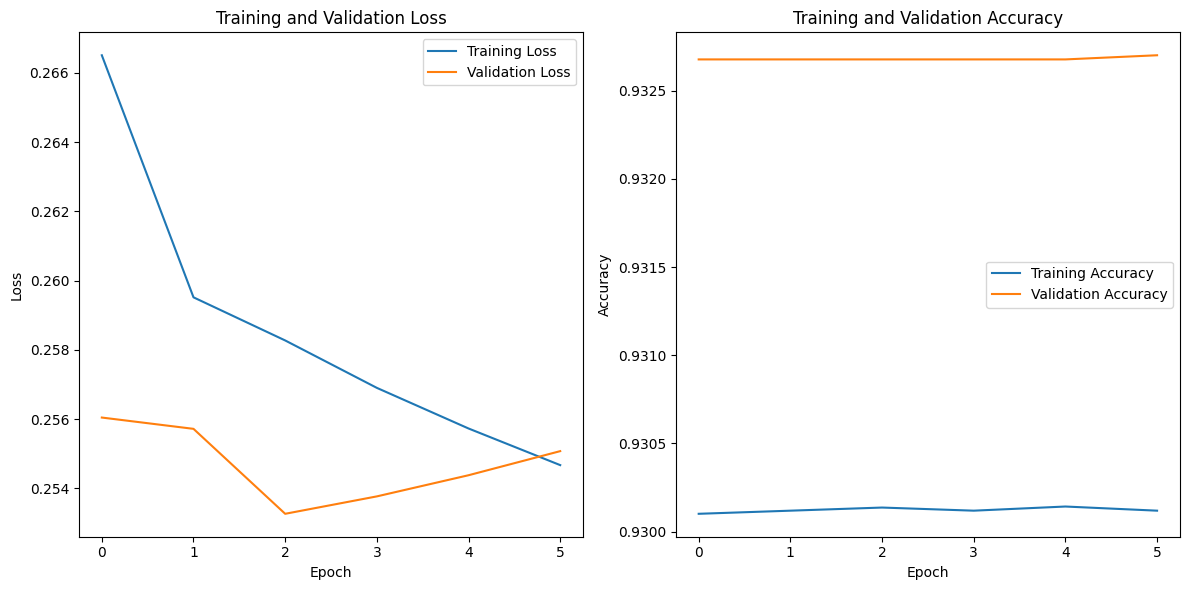

In [77]:
import matplotlib.pyplot as plt
# Plotting the training and validation metrics
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(losses['loss'], label='Training Loss')
plt.plot(losses['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(losses['accuracy'], label='Training Accuracy')
plt.plot(losses['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define your model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X.shape[1],)))
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    hp_layers = hp.Int('layers', min_value=1, max_value=3, step=1)
    for _ in range(hp_layers):
        model.add(layers.Dense(units=hp_units, activation='relu'))
        
    model.add(layers.Dense(4, activation='softmax'))
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Performing the search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # adjust as needed
    directory='keras_tuner_dir',
    project_name='hyperparameter_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Storing the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from keras_tuner_dir/hyperparameter_tuning/tuner0.json


/var/folders/yy/xjt13mzj6kv4svpzxqp0fjcr0000gn/T/ipykernel_81981/2008117633.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [79]:
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Assuming 'y_test' contains the true labels for the test set
# Calculate accuracy on the test set
accuracy = np.sum(predicted_labels == y_test) / len(y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2071/2071 [==============================] - 1s 336us/step
Test Accuracy: 92.94%
